Objetivo (2 puntos)
TCGA (The Cancer Genome Atlas) es un proyecto colaborativo dirigido por el Instituto Nacional del Cáncer
(NCI) y el Instituto Nacional de Investigación del Genoma Humano (NHGRI) en los Estados Unidos. Su objetivo
principal es caracterizar exhaustivamente las alteraciones genómicas en el cáncer mediante el análisis de
grandes conjuntos de datos de pacientes con cáncer. Se pretende crear un clasificador de cáncer que tenga
en cuenta las probabilidades de pertenecer a una clase dependiendo de las distintas variables y sus valores.
Usa scikit-learn junto con las librerías que necesites para resolver las siguientes cuestiones.

1) Realiza todo el preprocesamiento necesario para poder entrenar el clasificador con datos
categóricos (en el caso de transformaciones de datos continuos se usarán los cuartiles creados por
el diagrama de tallos y hojas). Muestra las distintas tablas de distribución. (1 punto)

2) Crea el clasificador e indica su error. Úsalo para saber a qué clase corresponden al menos 10
clientes que no hayas usado para entrenar los modelos. (1 punto)

# LAB03 Práctica 2

## Preparación y limpieza de los datos

Comenzamos importando las librerias necesarias, es decir las que vamos a usar para la limpieza y creacion del modelo.

In [103]:
from os import defpath
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer

# Cargar el conjunto de datos
data = pd.read_csv('TCGA.csv')


Imprimimos todas las columnas del csv para ver de forma mas clara con que variables estamos operando.

In [104]:
print(data.columns)
data

Index(['Grade', 'Project', 'Case_ID', 'Gender', 'Age_at_diagnosis',
       'Primary_Diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR',
       'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1',
       'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA'],
      dtype='object')


,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,GBM,TCGA-GBM,TCGA-19-5959,Female,77 years 325 days,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
858,GBM,TCGA-GBM,TCGA-16-0846,Male,85 years 65 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
859,GBM,TCGA-GBM,TCGA-28-1746,Female,77 years 178 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
860,GBM,TCGA-GBM,TCGA-32-2491,Male,63 years 121 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


Observamos que age at diagnosis es una variable numerica por lo cual vamos a dividirlo en cuartiles, es decir extraemos los numeros del campo Age at diagnosis que va a representar la edad en años. Tambien para ello tenemos que imputar los valores NaN de la columna Age usando la mediana

In [105]:
# Asumiendo que 'data' es tu DataFrame y ya está cargado
# Extraer solo los números del campo 'Age_at_diagnosis' que debería representar la edad en años
data['Age'] = data['Age_at_diagnosis'].str.extract('(\d+)').astype(float)

# Imputar valores NaN en la columna 'Age' usando la mediana
imputer = SimpleImputer(strategy='median')
data['Age'] = imputer.fit_transform(data[['Age']])

# Configuración del KBinsDiscretizer para usar cuartiles
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
data['Age_quartiles'] = est.fit_transform(data[['Age']])

# Mostrar cómo están distribuidos los datos transformados (tabla de distribución)
print(data['Age_quartiles'].value_counts().sort_index())

# Diagrama de tallos y hojas simple
def simple_stem_and_leaf(data, leaf_digits=1):
    from math import floor
    stem_leaf = {}
    for number in data:
        stem = floor(number / 10 ** leaf_digits)
        leaf = number % 10 ** leaf_digits
        if stem not in stem_leaf:
            stem_leaf[stem] = []
        stem_leaf[stem].append(leaf)
    for stem in sorted(stem_leaf.keys()):
        print(f"{stem} | {' '.join(str(leaf) for leaf in sorted(stem_leaf[stem]))}")

# Llamada a la función con datos de cuartiles
simple_stem_and_leaf(data['Age_quartiles'].tolist())


Age_quartiles
0.0    214
1.0    204
2.0    216
3.0    228
Name: count, dtype: int64
0 | 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 

Vamos a graficar el diagrama de tallos y hojas en base 10.

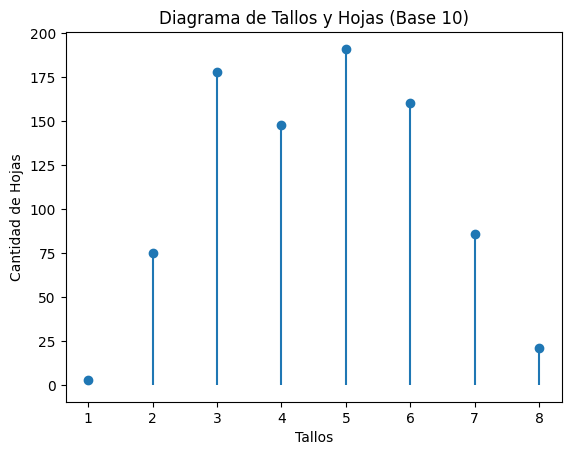

In [106]:
import matplotlib.pyplot as plt

def stem_and_leaf_plot(data, leaf_digits=1):
    from math import floor
    # Preparación de los datos
    data = data.dropna()  # Asegurando que no hay NaNs
    data = data.apply(lambda x: floor(x / 10**leaf_digits))  # Escalando los datos

    leaves = data.value_counts().sort_index()
    fig, ax = plt.subplots()
    ax.stem(leaves.index, leaves, basefmt=" ")
    ax.set_title('Diagrama de Tallos y Hojas (Base 10)')
    ax.set_xlabel('Tallos')
    ax.set_ylabel('Cantidad de Hojas')
    plt.show()

# Llamada a la función usando los datos de edad completos
stem_and_leaf_plot(data['Age'])

Los "tallos" representan la decena de años.

Las "hojas" muestran cuántos datos caen en cada grupo de tallos, proporcionando una forma rápida de ver la distribución de edades en el conjunto de datos.

El gráfico muestra la cantidad de entradas para cada grupo de edad basado en las decenas, lo que te permite visualizar la concentración de edades de una manera muy visual y detallada. Podemos observar que se concentra mas desde los 30 años hasta los 60 años .

In [107]:
# Suponiendo que 'data' es tu DataFrame
# Convertir todas las columnas a tipo 'category'
data = data.astype('category')

# Asignar un número a cada una de las categorías utilizando codificación para cada columna categórica
for column in data.columns:
    data[column] = data[column].cat.codes

# Mostrar los cambios en las primeras filas del dataframe para verificar
data.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Age,Age_quartiles
0,1,1,480,2,410,5,5,0,1,1,...,1,1,1,1,1,1,1,1,34,2
1,1,1,732,2,223,4,5,0,1,1,...,1,1,1,1,1,1,1,1,21,1
2,1,1,692,2,174,1,5,0,0,0,...,1,1,1,1,1,1,1,1,18,0
3,1,1,518,1,126,2,5,0,0,0,...,1,1,1,1,1,1,0,1,15,0
4,1,1,775,2,104,2,5,0,0,0,...,1,1,1,1,1,1,1,1,14,0


Vamos a crear la matriz de correlaciones para observar sus dependencias y para luego escoger una variable objetivo, todo esto se hace para tener mas informacion de nuestras variables y sus caracteristicas

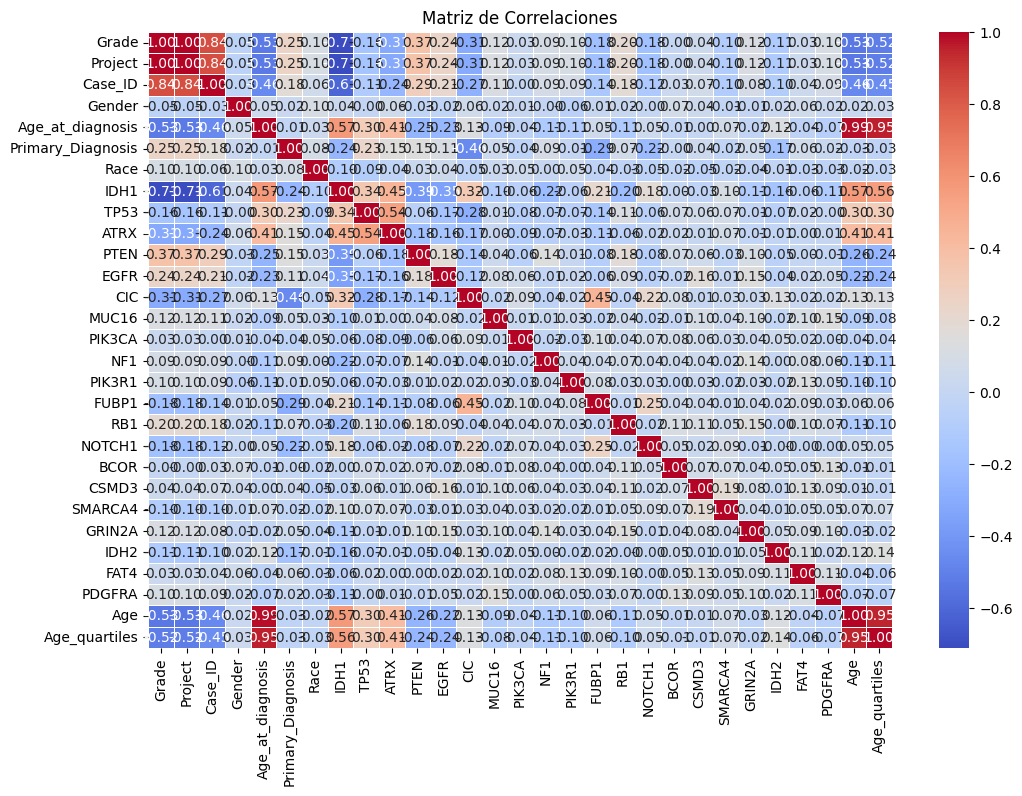

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'data' es tu DataFrame y ya está cargado
# Calculando la matriz de correlación
correlation_matrix = data.corr()

# Visualización de la matriz de correlación usando un heatmap
plt.figure(figsize=(12, 8))  # Puedes ajustar el tamaño según tus necesidades
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlaciones')
plt.show()

In [109]:
# Eliminar las filas con datos faltantes explícitamente
data.dropna(inplace=True)

# Comprobación adicional para asegurar que no se eliminen columnas accidentalmente
if data.empty:
    raise Exception("El DataFrame está vacío después de la codificación. Revisar el proceso de codificación.")


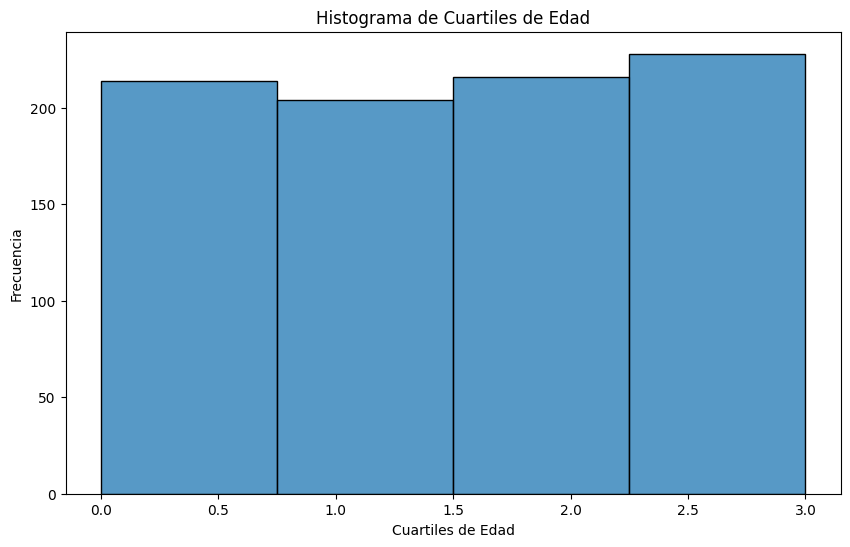

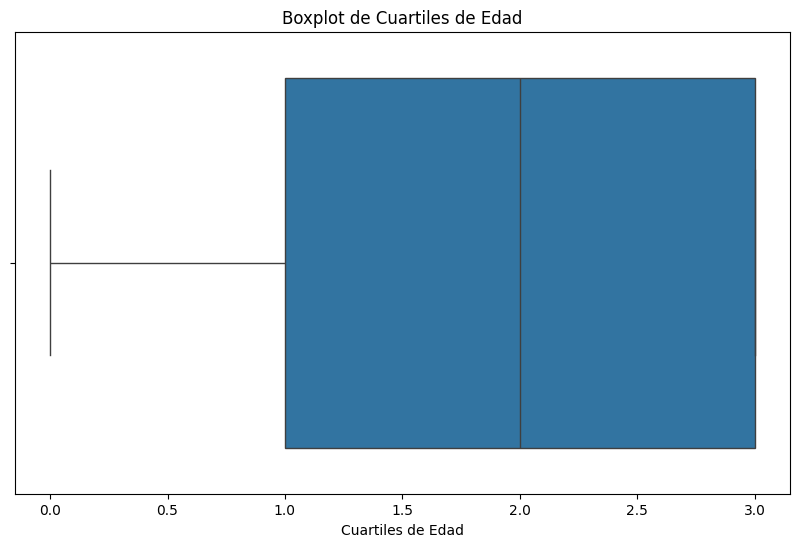

In [110]:
# Gráfico de Histograma para Age_quartiles
plt.figure(figsize=(10, 6))
sns.histplot(data['Age_quartiles'], bins=4, kde=False)
plt.title('Histograma de Cuartiles de Edad')
plt.xlabel('Cuartiles de Edad')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de Boxplot para Age_quartiles
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Age_quartiles'])
plt.title('Boxplot de Cuartiles de Edad')
plt.xlabel('Cuartiles de Edad')
plt.show()

Las alturas de las barras parecen ser relativamente similares, lo que sugiere que la población está distribuida de manera bastante uniforme a través de estos cuatro grupos de edad. El eje x categoriza las edades en cuatro cuartiles (de 0.0 a 3.0), y el eje y muestra la frecuencia de casos dentro de cada cuartil.

Distribución de la variable 'Grade':
 Grade
1    499
0    363
Name: count, dtype: int64


<ipython-input-111-a1f7b5190218>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=data, palette='Set2')


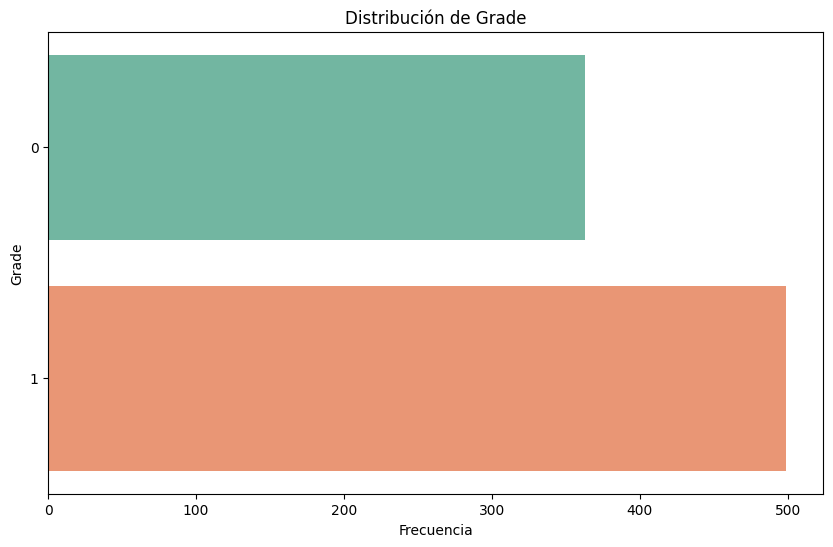

<ipython-input-111-a1f7b5190218>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=data, palette='Set2')


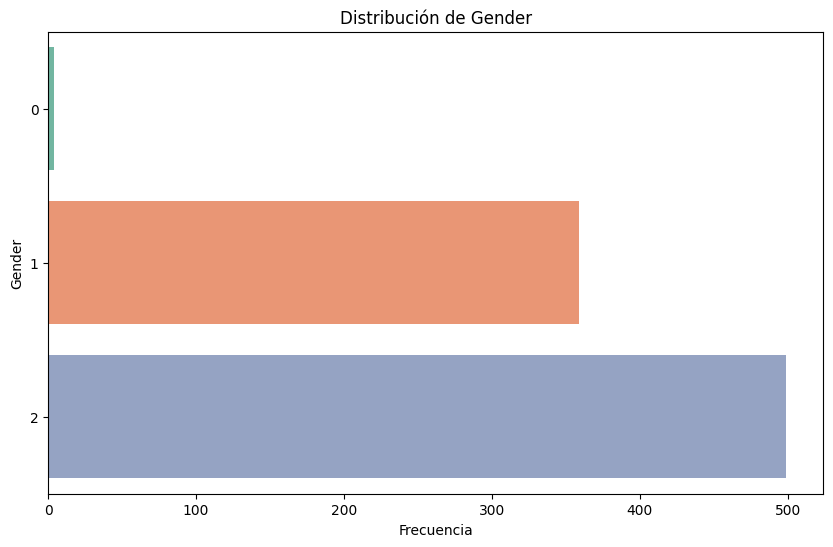

<ipython-input-111-a1f7b5190218>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=data, palette='Set2')


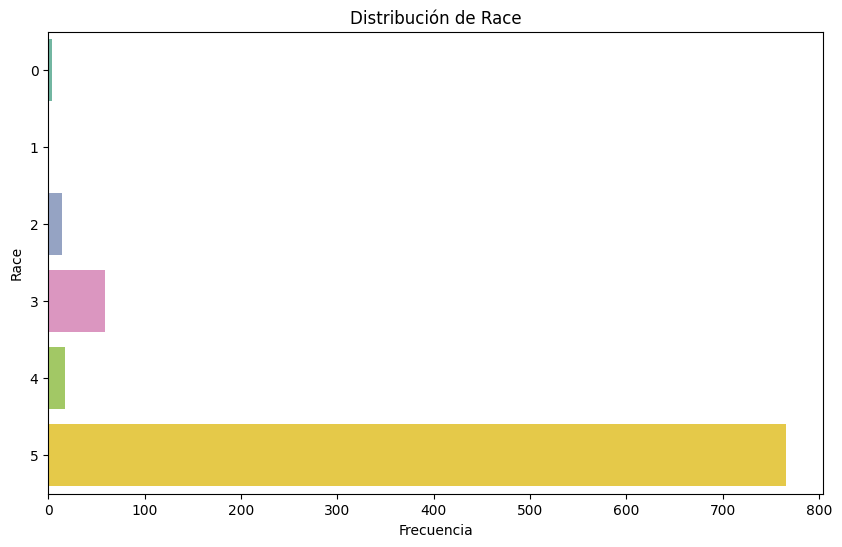

In [111]:
# Función para mostrar gráficos de barras de distribución de variables categóricas
def plot_categorical_distribution(data, column, figsize=(10, 6), title=None):
    if title is None:
        title = f'Distribución de {column}'
    plt.figure(figsize=figsize)
    sns.countplot(y=column, data=data, palette='Set2')
    plt.title(title)
    plt.xlabel('Frecuencia')
    plt.ylabel(column)
    plt.show()

# Tabla de distribución para 'Grade'
grade_distribution = data['Grade'].value_counts()
print("Distribución de la variable 'Grade':\n", grade_distribution)

# Gráfico de distribución para 'Grade'
plot_categorical_distribution(data, 'Grade')

# Otras variables
plot_categorical_distribution(data, 'Gender')
plot_categorical_distribution(data, 'Race')

En cuanto a la distribucion de la variable objetivo, . Hay dos barras, una para cada género, con la altura de cada barra representando la cantidad de individuos de ese género. El género que corresponde a la barra azul tiene una mayor frecuencia que el género representado por la barra naranja. El eje x muestra la frecuencia y el eje y está etiquetado como 'Gender', indicando los hombre y las mujeres. La representación visual indica un desequilibrio de género con una predominancia del género correspondiente a la barra azul.

## Creacion y entrenamiento del modelo

In [112]:
y = data['Grade'];
X = data.drop('Grade', axis=1);

In [113]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [115]:
# Evaluación del modelo
y_pred = knn.predict(X_test)
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))
print("Exactitud del modelo:", accuracy_score(y_test, y_pred))

Informe de Clasificación:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.99      1.00      0.99        97

    accuracy                           0.99       173
   macro avg       0.99      0.99      0.99       173
weighted avg       0.99      0.99      0.99       173

Exactitud del modelo: 0.9942196531791907


Los resultados del informe de clasificación muestran un alto nivel de precisión, exhaustividad (recall) y puntuación F1 para ambas clases (0 y 1), lo que sugiere que el modelo de clasificación está realizando excepcionalmente bien en este conjunto de datos de prueba. Una precisión y un recall cercanos a 1 indican que casi todos los casos positivos y negativos reales fueron identificados correctamente por el modelo.

La exactitud global del modelo es del 99.42%, lo cual es extraordinariamente alto para la mayoría de las aplicaciones prácticas, indicando que hizo predicciones correctas en el 99.42% de los casos. Las medias macro y ponderada, que también son cercanas a 1, revelan que el modelo tiene un desempeño equilibrado entre las clases, lo que es especialmente importante en situaciones donde las clases pueden estar desbalanceadas.

En resumen, estos resultados sugieren que el modelo es muy efectivo para clasificar las instancias en este conjunto de datos particular, con una tasa de error muy baja.

In [116]:
# Tomar las primeras 10 muestras del conjunto de prueba y las verdaderas etiquetas
sample_test_data = X_test.head(10)
sample_true_labels = y_test.head(10)

# Utilizar el modelo para predecir la clase de los 10 clientes
sample_test_predictions = knn.predict(sample_test_data)

# Crear un DataFrame para mostrar las predicciones, las verdaderas etiquetas y si la predicción fue correcta
results = pd.DataFrame({
    'Predicción': sample_test_predictions,
    'Clase Real': sample_true_labels,
    'Acertado': sample_test_predictions == sample_true_labels
})

print(results)

     Predicción  Clase Real  Acertado
715           0           0      True
605           0           0      True
120           1           1      True
208           1           1      True
380           1           1      True
817           0           0      True
575           0           0      True
266           1           1      True
557           0           0      True
826           0           0      True


Podemos observar que nuestro modelo ha predicho correctamente 10 de las 10 muestras del conjunto de prueba.